## Test Model
testing to see if fitting algorith corretly fits to models given.
This will be done by giving it the same SR and expecting the weights to be uniformly destributed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tesser import cython_sr
from tesser import cython_fit
from tesser import util
import importlib

In [2]:
data_dir= "/mnt/c/Users/rodv2/Dropbox/tesser_successor/Data"
tdir = "/home/work-machine/Preston_Lab/tesser_successor/Data/Transitional_Matrices"

In [3]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)
n_states = 21
subj_list = util.subj_list()

In [4]:
induct_all.QuestType.unique()

array(['Prim', 'Bound2', 'Bound1'], dtype=object)

In [5]:
fixed = {'gamma': 0.5, "gamma2": 0.5}
var_names = ['alpha', 'tau', 'w_prim' ,'w_bound1', 'w_bound2']
var_bounds = {'alpha': [0, 1], 'tau': [0, 10],
              'w_prim' : [0, 1], 'w_bound1' : [0, 1], 'w_bound2' : [0, 1]}
results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, split =True,
                               n_states=n_states, verbose=False, model_type='multiple gamma', model=[], split_list =["w"])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating

In [6]:
results=results.set_index('subject')
results.head()

,gamma,gamma2,alpha,tau,w_prim,w_bound1,w_bound2,log_like
subject,,,,,,,,
100,0.5,0.5,0.000000,9.114231,0.729024,0.585087,0.278239,-29.112182
101,0.5,0.5,0.803806,0.494616,0.041210,0.285185,0.609071,-27.418858
102,0.5,0.5,0.013041,0.080330,0.715298,0.219348,0.937652,-21.204891
103,0.5,0.5,0.707366,0.259809,0.060171,0.979636,0.218620,-25.363494
104,0.5,0.5,0.793360,1.059795,0.571717,0.140532,0.206933,-28.407428


In [7]:
importlib.reload(cython_fit)

<module 'tesser.cython_fit' from '/home/work-machine/Preston_Lab/tesser_successor/tesser/cython_fit.py'>

array([[<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'gamma2'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'w_prim'}>,
        <AxesSubplot:title={'center':'w_bound1'}>],
       [<AxesSubplot:title={'center':'w_bound2'}>,
        <AxesSubplot:title={'center':'log_like'}>, <AxesSubplot:>]],
      dtype=object)

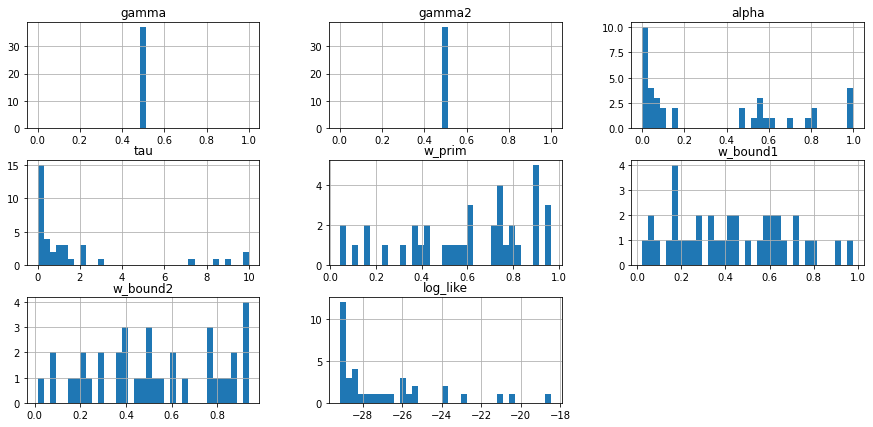

In [8]:
# cython_fit.plot_by_question(struct_all, induct_all, results, split =True, n_states= 21, model =[[]],
#                             model_type= 'multiple gamma',
#                             fig_name='Multiple gamma matrix by question'),
results.hist(bins=35,figsize= (15,7))